# Thunderbird 2 supercomputer logs EDA

## Introduction
This notebook contains exploratory data analysis of Thunderbird 2 supercomputer logs that is a part of CFDR data (see https://www.usenix.org/cfdr-data). CFDR data contains logs of 22 high-performance computing systems. The workloads run on those systems are large-scale long-running 3D scientific simulations, e.g. for nuclear stockpile stewardship. 

Original dataset used for extracting the sample under analysis is a raw text file containing event logs collected between 2004 and 2006 containing alert and non-alert messages identified by alert category tags. Thunderbird supercomputer logs dataset is suitable for alert detection and prediction research.

## The data set overview
Thunderbird original logs contain 211,212,192 messages, where 3,248,239 of them are related to 10 categories of alerts.  Non-alert messages are starting with "-" mark.

The logs were collected using UDP protocol for transmission. Some alert messages are missing in sample records that was caused by network connection interruption.

The data sample used for further analysis is extracted from the original one as a random subsample containing 0,5% of records.

More detailed dataset description can be found in the paper written by Adam Oliner and Jon Stearley [1].

## References
1. Oliner, Adam & Stearley, Jon. (2007). What Supercomputers Say: A Study of Five System Logs. 575-584. 10.1109/DSN.2007.103. 


# Exploratory data analysis

## I. The dataset overview

Install all necessary packages:

In [3]:
import install_packages

install_packages.install()
    

Load the dataset:

In [19]:
import pandas as pd

data = pd.read_csv("data/tbird2_sample.csv")
data.head()

,alert_class,message_id,IP,host_name,month,day,time,host_privilege,app_name,message
0,-,1136327431,2006.01.03,an922,Jan,3,14:30:31,an922/an922,smartd[1976]:,Configuration file /etc/smartd.conf parsed.
1,-,1135346286,2005.12.23,dn669,Dec,23,05:58:06,dn669/dn669,crond[1281]:,(root) CMD (run-parts /etc/cron.hourly)
2,-,1136415929,2006.01.04,bn948,Jan,4,15:05:29,bn948/bn948,kernel:,Probing IDE interface ide4...
3,-,1134356625,2005.12.11,an212,Dec,11,19:03:45,an212/an212,Server,Administrator: Instrumentation Service EventID...
4,-,1135321264,2005.12.22,an23,Dec,22,23:01:04,an23/an23,crond(pam_unix)[6624]:,session closed for user root


Let's take an overview of alert categories:

In [6]:
data.alert_class.value_counts()

-                 219653
R_VAPI              7705
R_MTT               2140
N_CALL_TR            146
R_SCSI1                8
N_NFS                  5
R_MPT                  4
R_EXT_FS_ABRT2         3
R_EXT_FS_ABRT1         1
R_SCSI0                1
R_EXT_INODE2           1
Name: alert_class, dtype: int64

The sample contains 219653 non-alert messages, that is the majority of records.
R_EXT_FS_ABRT2, R_EXT_FS_ABRT1, and R_EXT_INODE2 are related to one type of alert - EXT.
R_SCSI1, R_SCSI0 are related to one type of alert - SCSI.

## II. Missing entries overview

In [10]:
data.isnull().sum()

alert_class         0
message_id          0
IP                  0
host_name           0
month               0
day                 0
time                0
host_privilege      0
app_name            0
message           850
dtype: int64

850 entries have logs with lost messages.

## III. Features correlation heatmap

In [23]:
data.head()

,alert_class,message_id,IP,host_name,month,day,time,host_privilege,app_name,message
0,-,1136327431,2006.01.03,an922,Jan,3,14:30:31,an922/an922,smartd[1976]:,Configuration file /etc/smartd.conf parsed.
1,-,1135346286,2005.12.23,dn669,Dec,23,05:58:06,dn669/dn669,crond[1281]:,(root) CMD (run-parts /etc/cron.hourly)
2,-,1136415929,2006.01.04,bn948,Jan,4,15:05:29,bn948/bn948,kernel:,Probing IDE interface ide4...
3,-,1134356625,2005.12.11,an212,Dec,11,19:03:45,an212/an212,Server,Administrator: Instrumentation Service EventID...
4,-,1135321264,2005.12.22,an23,Dec,22,23:01:04,an23/an23,crond(pam_unix)[6624]:,session closed for user root


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000018D950C1080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x0000018D950C1080>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=55.0 to Arial ('C:\\WINDOWS\\Fonts\\arial.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


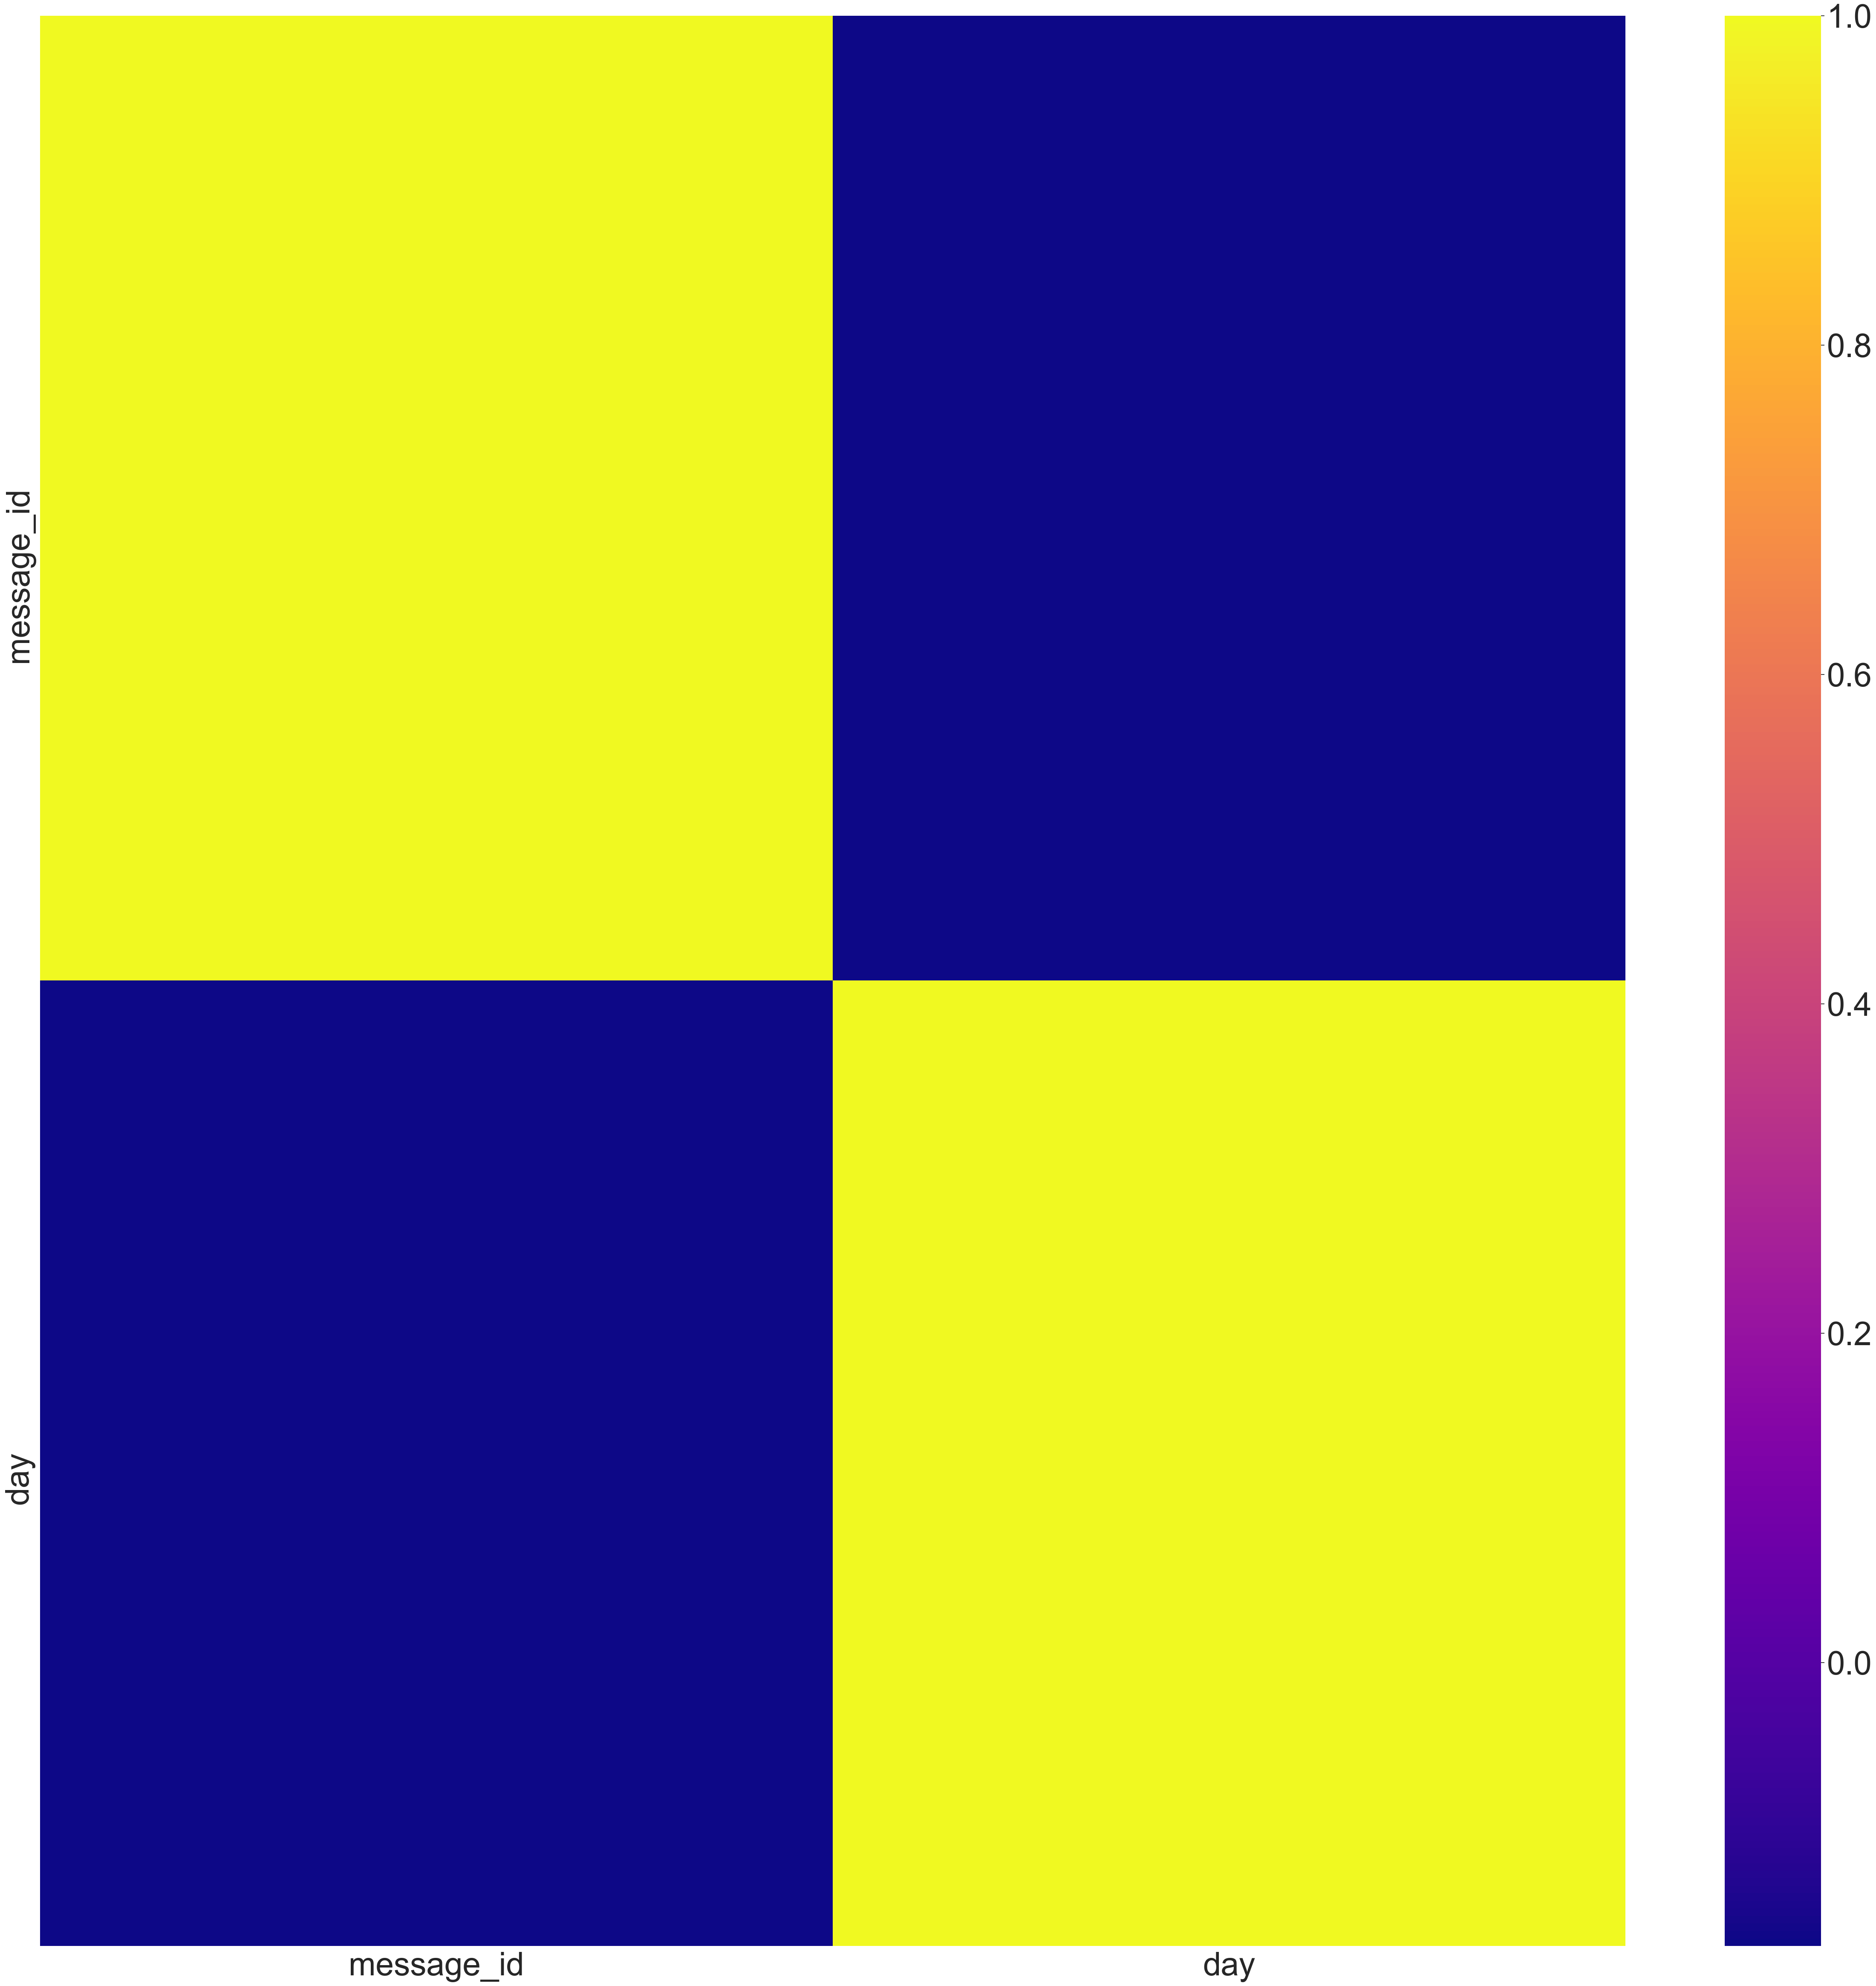

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(60, 60))
sns.set(font_scale=5)
correlation_matrix = data.corr(method='pearson', min_periods=1)
sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()